## Titanic disaster analysis

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data Description

Get the overview and stucture of the data for better understanding

In [27]:
# Attributes of the training data
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
# A look into content of the first few entries
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# A look into dtypes of the columns and number of non-null entries
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
# Qyantitative description of data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Meyer, Mr. Edgar Joseph",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## Analysis using Passenger Class

Some usefull insights

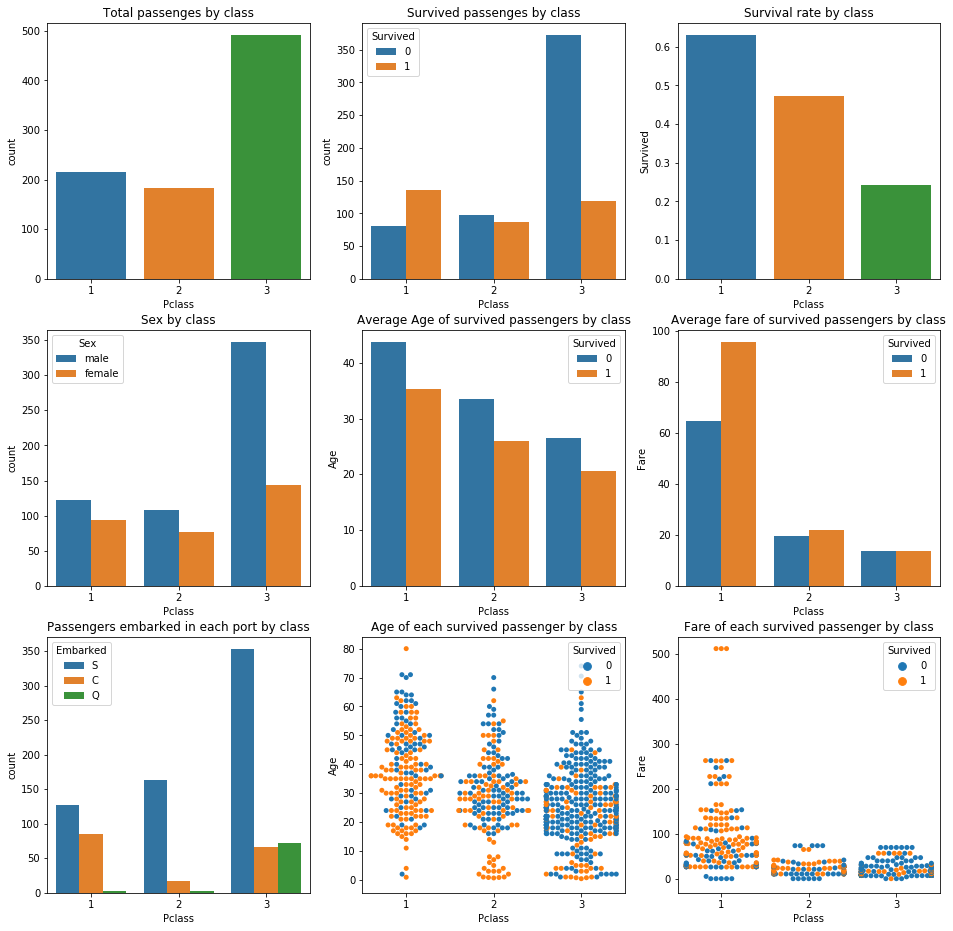

In [113]:
f,ax = plt.subplots(3,3,figsize=(16,16))
sns.countplot('Pclass',data=train, ax=ax[0,0])
sns.countplot('Pclass',hue='Survived', data=train, ax=ax[0,1])
sns.countplot('Pclass',hue='Sex', data=train, ax=ax[1,0])
sns.barplot(x="Pclass", y="Survived",data=train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean(), ax=ax[0,2])
sns.barplot(x="Pclass", y="Age", hue="Survived",data=train[["Pclass", "Age", "Survived"]].groupby(["Pclass", "Survived"], as_index=False).mean(), ax=ax[1,1])
sns.barplot(x="Pclass", y="Fare", hue="Survived",data=train[["Pclass", "Fare", "Survived"]].groupby(["Pclass", "Survived"], as_index=False).mean(), ax=ax[1,2])
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=train, ax=ax[2,1])
sns.swarmplot(x="Pclass", y="Fare", hue="Survived", data=train, ax=ax[2,2])
sns.countplot('Pclass',hue='Embarked', data=train, ax=ax[2,0])
ax[0,0].set_title("Total passenges by class")
ax[0,1].set_title("Survived passenges by class")
ax[0,2].set_title("Survival rate by class")
ax[1,0].set_title("Sex by class")
ax[1,1].set_title("Average Age of survived passengers by class")
ax[1,2].set_title("Average fare of survived passengers by class")
ax[2,0].set_title("Passengers embarked in each port by class")
ax[2,1].set_title("Age of each survived passenger by class")
ax[2,2].set_title("Fare of each survived passenger by class")

**Total passengers by class:** Number of passengers travelled in each class.

**Survived passengers by class:** Number of passengers survived, deceased in each class

**Survival rate by class:** Percent of passengers survived in each class

**Sex by class:** Number of males/females in each class

**Average Age of survived passengers by class:** Average age of passengers survived, deceased in each class

**Average Fare of survived passengers by class:** Average fare of passengers survived, deceased in each class

**Passengers embarked in each port by class:** Number of passengers embarked from each port on to the ship in each class

**Age of each survived passenger by class:** age of each passenger divided into survived/deceased with in each class

**Fare of each survived passenger by class:** Fare of each passenger divided into survived/deceased with in each class

## Analysis using Passenger Sex

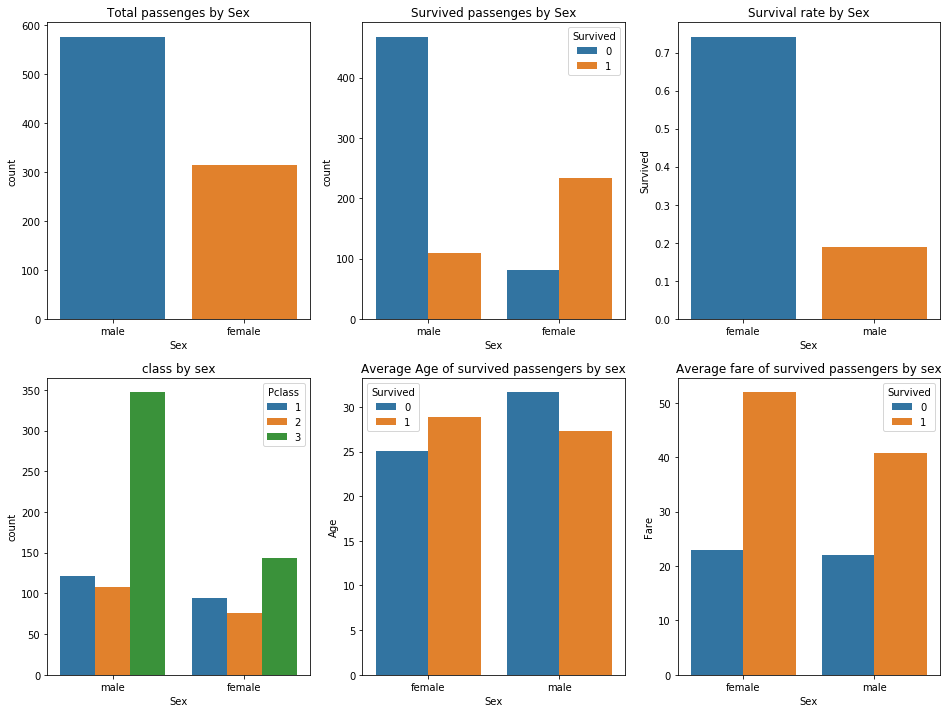

In [114]:
f,ax = plt.subplots(2,3,figsize=(16,12))
sns.countplot('Sex',data=train, ax=ax[0,0])
sns.countplot('Sex',hue='Survived', data=train, ax=ax[0,1])
sns.countplot('Sex',hue='Pclass', data=train, ax=ax[1,0])
sns.barplot(x="Sex", y="Survived",data=train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean(), ax=ax[0,2])
sns.barplot(x="Sex", y="Age", hue="Survived",data=train[["Sex", "Age", "Survived"]].groupby(["Sex", "Survived"], as_index=False).mean(), ax=ax[1,1])
sns.barplot(x="Sex", y="Fare", hue="Survived",data=train[["Sex", "Fare", "Survived"]].groupby(["Sex", "Survived"], as_index=False).mean(), ax=ax[1,2])
ax[0,0].set_title("Total passenges by Sex")
ax[0,1].set_title("Survived passenges by Sex")
ax[0,2].set_title("Survival rate by Sex")
ax[1,0].set_title("class by sex")
ax[1,1].set_title("Average Age of survived passengers by sex")
ax[1,2].set_title("Average fare of survived passengers by sex")